# ASTR 19 Final Project

Import packages needed for the project

In [52]:
import numpy as np
from astropy.io import fits
import sep
import matplotlib.pyplot as plt
from matplotlib import rcParams

Set rcParams for the format of the plots when using matplotlib.

In [53]:
rcParams["figure.figsize"] = [10., 8.]


https://docs.astropy.org/en/stable/io/fits/

Since we are using `astropy.io.fits`, we first get the HDU List from the `image.fits` file that we are using. The `image.fits` file is from the sep GitHub account ([Link here](https://github.com/kbarbary/sep/blob/main/data/image.fits)). HDU stands for 'Header Data Units' and it is the "fundamental container structure of the FITS format consisting of a `data` member and its associated metadata in a `header`" ([reference](https://docs.astropy.org/en/stable/io/fits/api/hdus.html)).

This cell opens the file and puts it into an HDU List object. The `info()` method was used to check the contents of the HDU List.

In [54]:
hdul = fits.open("image.fits")
hdul.info()

Filename: image.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     337   (256, 256)   int16 (rescales to float32)   


Here we get the data we are working with from the HDU List and put it into the `data` variable.

In [55]:
data = hdul[0].data

The matplotlib library was used to graph the data from the `image.fits` file. First, numpy was used to calculate the mean and the standard deviation of the data. Then, those values were used to set the parameters for the plot. A colorbar was also created on the side of the graph.

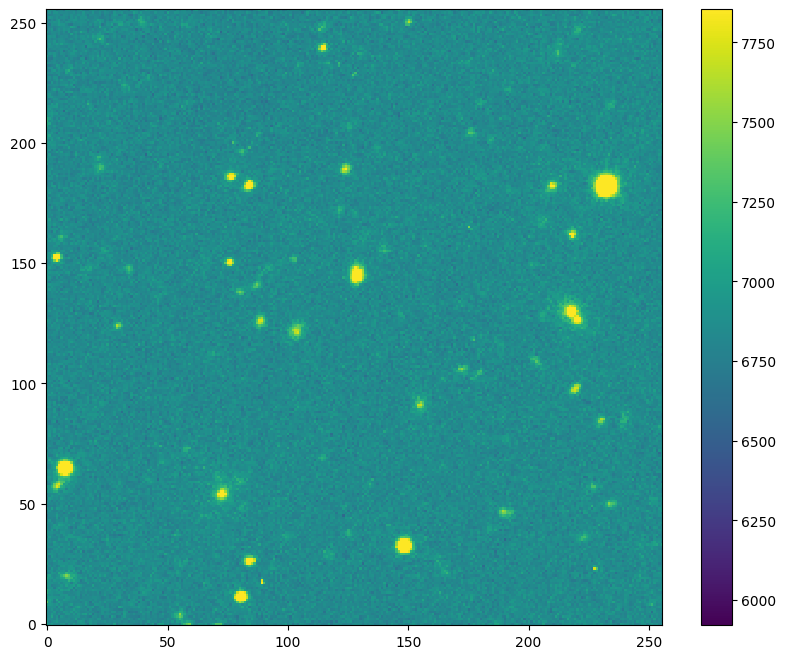

In [56]:
mean, std = np.mean(data), np.std(data)
plt.imshow(data, interpolation="nearest", vmin=(mean - std), vmax=(mean + std), origin="lower") # , cmap="gray"
plt.colorbar()

The `Background()` function gets a "representation of spatially variable image background and noise" ([reference](https://sep.readthedocs.io/en/v1.0.x/api/sep.Background.html)).

In [ ]:
bkg = sep.Background(data)

Close the HDU List object when done using it.

In [57]:
hdul.close()